In [ ]:
# torchvision.dataset = get dataset and dataloading for computer vision
# torchvision.models = using pre trained models for our own
# torchvision transforms = functions for manipulating images
# torch.utls.data.Dataset = base dataset class to create our own dataset

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

1.12.0+cu113
0.13.0+cu113


## Getting the dataset

In [ ]:
# We are going to use FashionMNIST dataset for this learning
# setup training data

train_data = datasets.FashionMNIST(
    root="data", # where we want to save the dataset to
    train=True, # we want the training dataset
    download=True, # we want to download the dataset
    transform=ToTensor(), # convert the images to tensors as need
    target_transform=None # how doo we wantt to transform the labels
)

test_data = datasets.FashionMNIST(
    root="data", 
    train=False, 
    download=True, 
    transform=ToTensor()
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
# we find the images to tensor. 
# PIL image - Python Image Library
# check to_transform documentation
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# check the target classes 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# getting ids for the different classes

class_to_idx = train_data.class_to_idx
class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

# grayscale - so 1 color channel

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## Visualize data as image

Text(0.5, 1.0, '9')

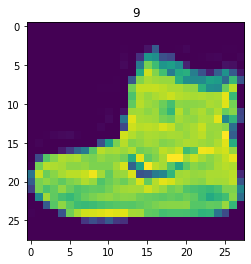

In [ ]:
plt.imshow(image.squeeze()) # matplotlib expects only the image W and H, so we get rid of the extra color dim
# squeeze removes the unit dimension
plt.title(label) # only 28 * 28 image so very pixelated looking

Text(0.5, 1.0, 'Ankle boot')

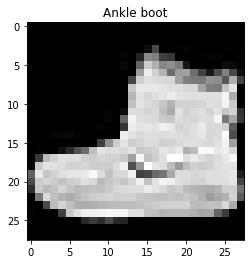

In [ ]:
plt.imshow(image.squeeze(), cmap='gray') # matplotlib expects only the image W and H, so we get rid of the extra color dim
# squeeze removes the unit dimension
plt.title(class_names[label]) # only 28 * 28 image so very pixelated looking

In [ ]:
# Plotting 16 random images
#torch.manual_seed(750)
#fig=plt.figure(figsize=(9, 9))
#rows, cols = 4, 4 # we are going to get 16 images
#for i in range(1, rows*cols+1):
  #print(i)
#  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx) # we get different images based on the  seed
#  img, label=train_data[random_idx]
#  fig.add_subplot(rows, cols, i)
#  plt.imshow(img.squeeze(), cmap="gray")
#  plt.title(class_names[label])
#  plt.axis(False)

## Prepare dataloader 

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Dataloader to turn the dataset in python iterable

### Turn data into batches or mini batches

#### Lets us take for now mini batches of 32 each
#### the optimizer will update per batch, So the training gets efficient. The batches will be shuffled.



In [ ]:
from torch.utils.data import DataLoader # also goes for text and any other datatypes

# set the hyperparam batch size
BATCH_SIZE=32

# Turn the dataset into iterable
train_dataloader=DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader=DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f35b95d6cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f35b94aa310>)

In [ ]:
print(f"Data Loaders: ", train_dataloader, test_dataloader)
print(f"Train Dataloader:  {len(train_dataloader)} batches of  {BATCH_SIZE}")
print(f"Test Dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Data Loaders:  <torch.utils.data.dataloader.DataLoader object at 0x7f35b95d6cd0> <torch.utils.data.dataloader.DataLoader object at 0x7f35b94aa310>
Train Dataloader:  1875 batches of  32
Test Dataloader: 313 batches of 32


In [ ]:
# check inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# train_features_batch will have the training images
# train labels batch will have the image labels meaning what the features together indicate
# iter will get the nextt batch in the iterator

train_features_batch.shape, train_labels_batch.shape
# torc.Size(batch_size, color_channel, height, width), torch.Size(BATCH_SIZE)

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label_size: torch.Size([])


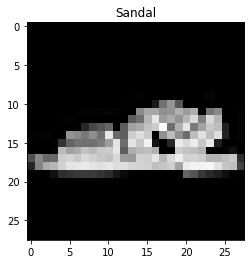

In [ ]:
# Show sample
#torch.manual_seed(999)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item() # creating a random image from the train dataset
img, label= train_features_batch[random_idx], train_labels_batch[random_idx] # getting the random image from the datasett and it particular label
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis=False
print(f"Image size: {img.shape}")
print(f"Label: {label}, label_size: {label.shape}")


## Build a baseline model

Baseline model can be inproved later with experimentation

In [ ]:
## Creating a FC flatten layer 

flatten_model = nn.Flatten()

# taking one feature into a different variable
x=train_features_batch[0]

# flattening the input
output=flatten_model(x)

# printing the shape of the first tensor [0] before and after flatteing
print(f"Shape before flattening: {x.shape}, -> [color_channel, height, width]")
print(f"Shape after flatteing: {output.shape}, -> [color_channel, height*width]")

Shape before flattening: torch.Size([1, 28, 28]), -> [color_channel, height, width]
Shape after flatteing: torch.Size([1, 784]), -> [color_channel, height*width]


In [ ]:
output # condense information into a single vector

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0000, 0.7294, 0.8471, 0.8431, 0.8627, 0.9686, 0.0000,
         0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
         0.0000, 0.0000, 0.0000, 0.3922, 0.9020, 0.9176, 0.9490, 0.9333, 0.9255,
         0.6627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.3294, 0.7216, 0.9647, 0.9216, 0.8510, 0.8667, 0.8667, 0.8588,
         0.8431, 0.9059, 1.0000, 0.7294, 0.3686, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0588, 0.7725, 0.9137, 0.8824, 0.8471, 0.8275, 0.8510, 0.9020, 0.8745,
         0.8706, 0.8745, 0.8353, 0.8392, 0.8863, 0.9059, 0.8157, 0.2039, 0.0000,
         0.0157, 0.0000, 0.0

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, 
               input_shape: int, 
               hidden_units: int, 
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), 
        nn.Linear(in_features=input_shape, 
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

## setup model with input params
model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10, ## how many hidden units for the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0.to("cpu") ## very important line - to keep the model on cpu top run

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1, 1, 28, 28])
model_0(dummy_x)

# also check what input shape certain layers expect

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## Set up loss optimizer and evaluation matrix

### Loss function here - cross entropy loss
### Optimizer - stochastic gradient descent

In [ ]:
# Calculate accuracy (a classification metric)
#   """Calculates accuracy between truth labels and predictions.
#    Args:
#        y_true (torch.Tensor): Truth labels for predictions.
#        y_pred (torch.Tensor): Predictions to be compared to predictions.
#    Returns:
#        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
#    """
#    correct = torch.eq(y_true, y_pred).sum().item()
#    acc = (correct / len(y_pred)) * 100
#    return acc

In [ ]:
# to get the github help function 
import requests
from pathlib import Path

# Download the helper function from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions already exits, skipping download... ... ..")
else:
  print("Downloading helper_functions.py from PyTorch repo ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions already exits, skipping download... ... ..


## Import accuracy metrics

In [ ]:
# import accuracy metrics
from helper_functions import accuracy_fn

# setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

## Creating a function to time our experiment

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """Time required to train the network"""
  total_time = end - start
  print(f"training time taken on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
# let us check the timer function

start_time = timer()
# we will put some modelling function code here
end_time = timer()
print_train_time(start_time, end_time, device='cpu')

training time taken on cpu: 0.000 seconds


4.102200000488665e-05

## Creating a training loop

### 1. Loop through epochs.
### 2. Loop through training batches, perform training steps, calculate the train loss *per batch*

### 3. Loop through testing batches, perform testing steps, calculate the test loss per batch
### 4. Time it all

In [ ]:
# use tqdm software to check how many epochs our training loop has gone through for the progress bar

from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer() # timer started before beginning the training

# set the number of epochs (we are keeping this small for faster training)
epochs = 3

# Training
for epoch in tqdm(range(epochs)): # to view our progress per epoch
  train_loss = 0
  print(f"epoch number = {epoch}")
  # Running through the training dataset to train our model
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    
    # forward pass
    y_pred=model_0(X)

    # calculate the loss per batch
    loss = loss_fn(y_pred, y) # expected to be quite high as it has loss of all the batches
    train_loss += loss # aggregate the losses of all the batches together

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # check out the train accuracy
    # train_acc+=accuracy_fn(X, )

    # lets now check out by printing what happened
    if batch%400==0:
       print(f"Gone through {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # let us find the average loss for each batch
  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc=0, 0
  model_0.eval()

  with torch.inference_mode():
    for X, y in test_dataloader:
    
      # Forward pass
      test_pred = model_0(X)

      # calculate loss
      test_loss += loss_fn(test_pred, y) # calculating together for all the batches

      # calculating accuracy
      test_acc+=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # comparing the labels so the columns need to be equal sized
      ## the true label is the given one the dataset
      # the argmax finds the highest value index for the prediction label
  
      # calculating the average test loss per batch
    test_loss /= len(test_dataloader)

      # calculating the average test accuarcy per batch
    test_acc /= len(test_dataloader)

  # let us check out whats happening
  print(f"\n Train loss = {train_loss:.2f} | Test loss = {test_loss:.2f} | Test accuracy = {test_acc:.2f}%\n")

# calculate the training time to check how long the model is taking to train on CPU
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                 end=train_time_end_on_cpu,
                                 device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoch number = 0
Gone through 0/60000 samples
Gone through 12800/60000 samples
Gone through 25600/60000 samples
Gone through 38400/60000 samples
Gone through 51200/60000 samples

 Train loss = 0.44 | Test loss = 0.47 | Test accuracy = 83.65%

epoch number = 1
Gone through 0/60000 samples
Gone through 12800/60000 samples
Gone through 25600/60000 samples
Gone through 38400/60000 samples
Gone through 51200/60000 samples

 Train loss = 0.44 | Test loss = 0.46 | Test accuracy = 83.89%

epoch number = 2
Gone through 0/60000 samples
Gone through 12800/60000 samples
Gone through 25600/60000 samples
Gone through 38400/60000 samples
Gone through 51200/60000 samples

 Train loss = 0.43 | Test loss = 0.47 | Test accuracy = 83.93%

training time taken on cpu: 18.849 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## Creating a custom function to evaluate our model

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary with the model name and performance"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions first
      y_pred = model(X)


      # agggregate the loss and accuracy functions
      loss+=loss_fn(y_pred, y)
      acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

      # find the loss and acc per batch
      loss/=len(data_loader)
      acc/=len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# passing model_0 for evaluation
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_acc': 0.3002890760994472,
 'model_loss': 0.0011192552046850324,
 'model_name': 'FashionMNISTModelV0'}